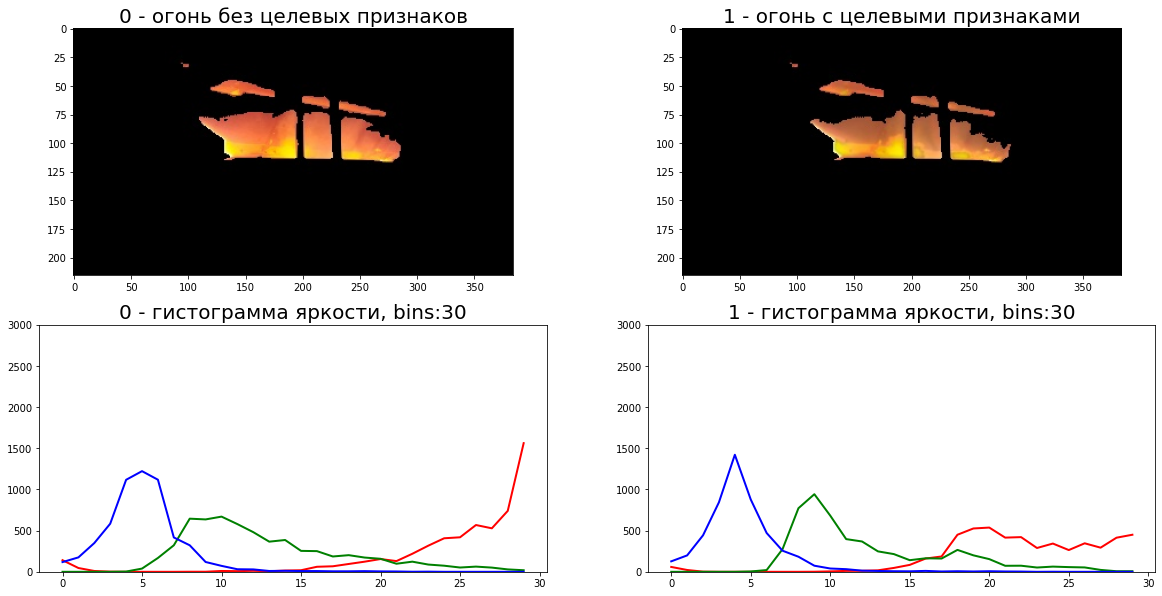

In [19]:
import cv2
import os
import matplotlib.pyplot as plt

img_n = 30

directory = 'extra_cropped_data/ground_mask/'
filename = str(img_n) + '.jpg'
filepath = os.path.join(directory, filename)

pic = cv2.imread(filepath)
rgb_pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)

directory_p = 'extra_cropped_data/proccesed_mask/'
filename_p = str(img_n) + 'p.jpg'
filepath_p = os.path.join(directory_p, filename_p)

pic_p = cv2.imread(filepath_p)
rgb_pic_p = cv2.cvtColor(pic_p, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

ax[0,0].imshow(rgb_pic) 
ax[0,0].set_title("0 - огонь без целевых признаков", fontsize=20)
ax[0,1].imshow(rgb_pic_p) 
ax[0,1].set_title("1 - огонь с целевыми признаками", fontsize=20)

par1 = 30
par2 = 30
par3 = 255

color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([rgb_pic],[i],None, [par1],[par2,par3])
    ax[1,0].plot(histr,color = col, linewidth=2.0)
    ax[1,0].set_ylim([0, 3000])
    ax[1,0].set_title("0 - гистограмма яркости, bins:{:d}".format(par1), fontsize=20)
    
for i,col in enumerate(color):
    histr = cv2.calcHist([rgb_pic_p],[i],None,[par1],[par2,par3])
    ax[1,1].plot(histr, color = col, linewidth=2.0)
    ax[1,1].set_ylim([0, 3000])
    ax[1,1].set_title("1 - гистограмма яркости, bins:{:d}".format(par1), fontsize=20)
plt.show()


In [5]:
# Создание датасета с использованием алгоритма экстракции признаков
# Сохранение датасета в формате csv

import numpy as np
import os
import cv2

par1 = 30
par2 = 30
par3 = 255
    
data = np.zeros((100, 1 + 3*par1))

directory = 'extra_cropped_data/ground_mask/'
for i in range(0,50):
    filename = str(i+1) + '.jpg'
    filepath = os.path.join(directory, filename)
    pic = cv2.imread(filepath)
    
    rgb_pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB) 

    data[i, 0] = 0
    
    color = ('r','g','b')
    for j,col in enumerate(color):
        histr = cv2.calcHist([rgb_pic],[j],None, [par1],[par2,par3])
        data[i, j*par1+1:(j+1)*par1+1] = histr[:,0]

directory_p = 'extra_cropped_data/proccesed_mask/'
for i in range(0,50):
    filename_p = str(i+1) + 'p.jpg'
    filepath_p = os.path.join(directory_p, filename_p)

    pic_p = cv2.imread(filepath_p)
    rgb_pic_p = cv2.cvtColor(pic_p, cv2.COLOR_BGR2RGB)

    data[i+50, 0] = 1
    
    color = ('r','g','b')
    for j,col in enumerate(color):
        histr = cv2.calcHist([rgb_pic_p],[j],None,[par1],[par2,par3])
        data[i+50, j*par1+1:(j+1)*par1+1] = histr[:,0]
        
data = np.asarray(data)
np.savetxt("data_hist_30_30_255_rgb.csv", data, delimiter=",", fmt='%d')

In [220]:
a = [[1,2,3,4,5,6], [3,4,5,6,7,78]]
a = np.asarray(a)